In [1]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from gillespy import gillespie

# First-order kinetics

The rate of change for the reaction

$$
X \xrightarrow{c} Z
$$

is given by the rate equation

$$
\frac{dX}{dt} = -cX
$$

whose solution at $t$ = 0 is

$$
X(t) = X_{0}e^{-ct}
$$

Stochastic simulation of this process can be modeled as follows:

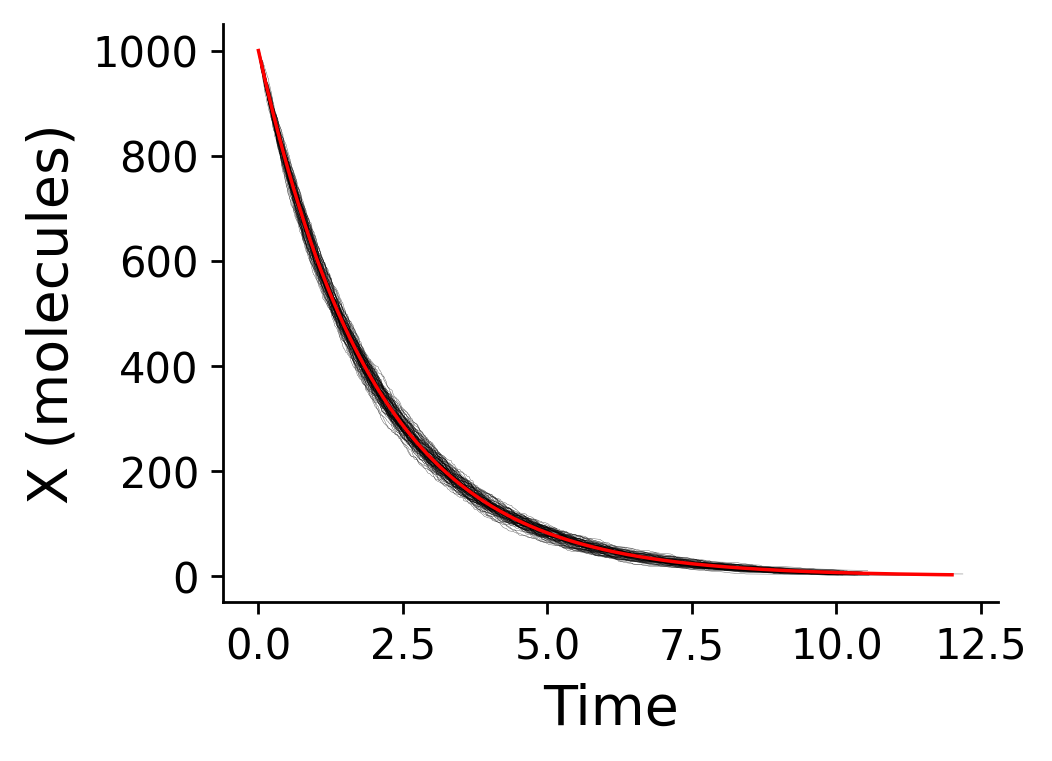

In [2]:
def deterministic_solution(t: NDArray, X0: float, c: float) -> NDArray:
    return X0 * np.exp(-c * t)


X0 = 1000
c = 0.5


def decay(y: List[int]) -> List[int]:
    return y


stop_time = 10

xi = np.linspace(0, stop_time + 2, 1000)
yi = deterministic_solution(xi, X0, c)

fig, ax = plt.subplots(figsize=(4, 3))

for _ in range(100):
    t, y = gillespie([X0], [c], [[-1]], decay, stop_time)

    t = np.array(t)
    y = np.array(y).squeeze()
    ax.plot(t, y, lw=0.1, alpha=0.8, color="k")


ax.plot(xi, yi, color="r", lw=1)
ax.set_xlabel("Time")
ax.set_ylabel("X (molecules)")
plt.savefig("figs/first-order.png", dpi=300, bbox_inches="tight")

# Lotka reactions

The Lotka reactions provide a simple predator-prey model.

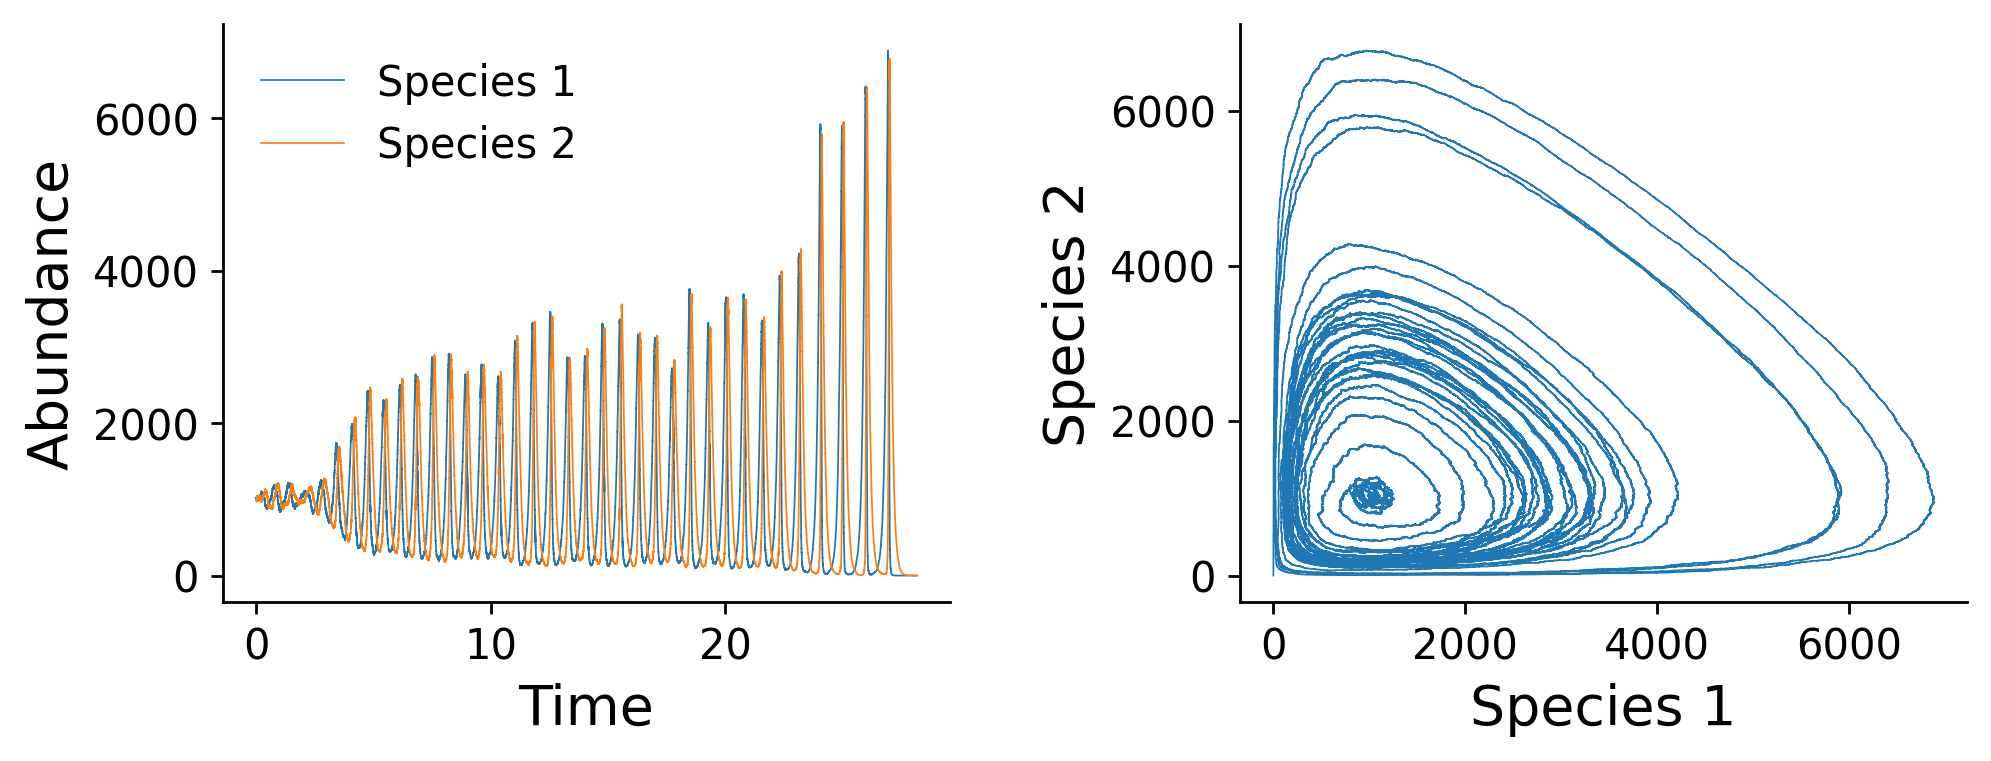

In [3]:
def lotka(y: List[int]) -> List[float]:
    return [y[0], y[0] * y[1], y[1]]


updater = [[1, 0], [-1, 1], [0, -1]]

t, species = gillespie([1000, 1000], [10.0, 0.01, 10.0], updater, lotka, 30)
t = np.array(t)
species = np.array(species)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3), gridspec_kw=dict(wspace=0.4))

ax0.plot(t, species[:, 0], lw=0.5, label="Species 1")
ax0.plot(t, species[:, 1], lw=0.5, label="Species 2")
ax0.set_xlabel("Time")
ax0.set_ylabel("Abundance")
ax0.legend()

ax1.plot(species[:, 0], species[:, 1], lw=0.5)
ax1.set_xlabel("Species 1")
__ = ax1.set_ylabel("Species 2")

# Brusselator reactions

A chemical oscillator system:

$$
\bar{X_{1}} \xrightarrow{c_{1}} Y_{1}
$$

$$
\bar{X_{2}} + Y_{1} \xrightarrow{c_{2}} Y_{2} + Z_{1}
$$

$$
2Y_{1} + Y_{2} \xrightarrow{c_{3}} 3Y_{1}
$$

$$
Y_{1} \xrightarrow{c4} Z_{2}
$$


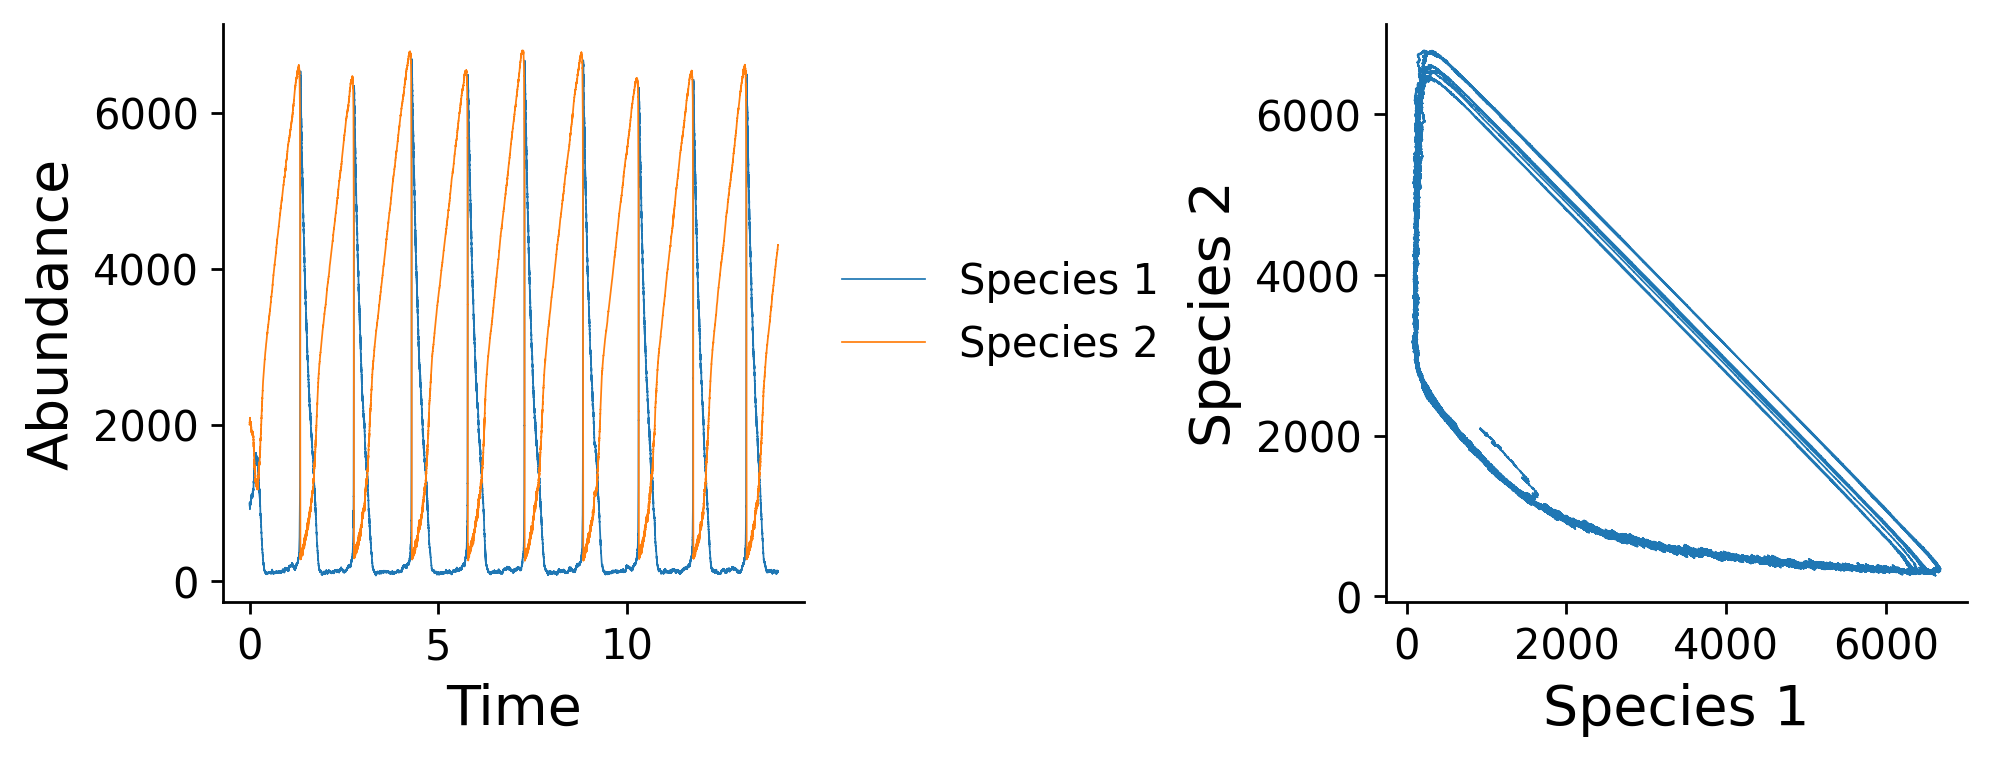

In [4]:
y = [1000, 2000]
c = [5000, 50, 0.00005, 5]
updater = [[1, 0], [-1, 1], [1, -1], [-1, 0]]
stop_time = 14

def brusselator(y: List[int]) -> List[float]:
    return [1.0, y[0], 0.5 * y[0] * y[1] * (y[0] - 1), y[0]]

t, species = gillespie(y, c, updater, brusselator, stop_time)
t = np.array(t)
species = np.array(species)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3), gridspec_kw=dict(wspace=1))
ax0.plot(t, species[:, 0], lw=0.5, label="Species 1")
ax0.plot(t, species[:, 1], lw=0.5, label="Species 2")
ax0.set_xlabel("Time")
ax0.set_ylabel("Abundance")
ax0.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")

ax1.plot(species[:, 0], species[:, 1], lw=0.5)
ax1.set_xlabel("Species 1")
__ = ax1.set_ylabel("Species 2")